# 从函数到 Transformer

一步步理解现代深度学习架构本笔记将带领你从最基础的函数概念出发，逐步理解现代深度学习架构的核心原理。

## 1. 两种思维范式：符号主义 vs 连接主义

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

### 1.1 符号主义 (Symbolic AI)

**核心思想**：通过人类的观察和总结，发现事物背后的规律，用明确的数学函数来描述。

**例子**：勾股定理 $a^2 + b^2 = c^2$

**局限性**：当问题足够复杂时，人类无法总结出明确的规律（如翻译、天气预测）。

### 1.2 连接主义 (Connectionism)

**核心思想**：不试图发现明确规律，而是根据输入-输出数据来"猜"出规律。

**步骤**：

1. 拿到输入数据 $X$ 和输出数据 $Y$
2. 假设一个函数形式（参数待定）
3. 计算预测值与真实值的偏差
4. 最小化偏差，得到近似规律

**最小二乘法示例**：一元一次线性回归

真实关系: y = 2x + 1
拟合结果: y = 1.6217x + 2.5491


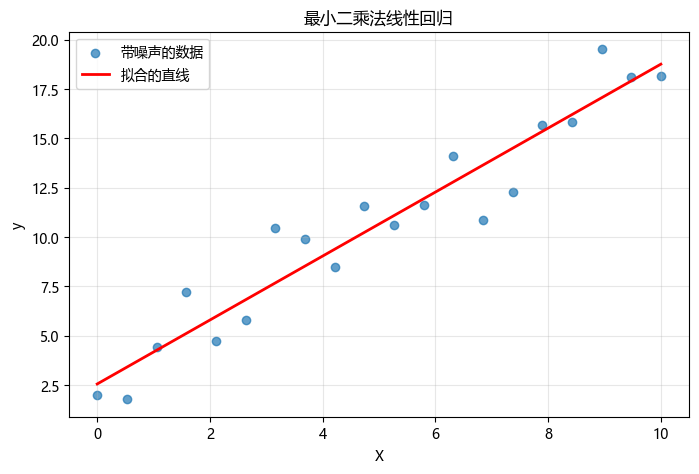

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：y = 2x + 1 + 噪声
np.random.seed(42)
X = np.linspace(0, 10, 20)
y_true = 2 * X + 1
y = y_true + np.random.randn(20) * 2  # 添加噪声

# 使用最小二乘法拟合
n = len(X)
k = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X**2) - np.sum(X)**2)
b = (np.sum(y) - k * np.sum(X)) / n

print(f"真实关系: y = 2x + 1")
print(f"拟合结果: y = {k:.4f}x + {b:.4f}")

# 可视化
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='带噪声的数据')
plt.plot(X, k * X + b, 'r-', linewidth=2, label='拟合的直线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('最小二乘法线性回归')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. 从线性到非线性：激活函数

### 2.1 为什么需要非线性？

现实世界中的规律往往是**非线性**的。线性函数（直线）无法拟合复杂的现实规律。

**解决方案**：引入非线性函数（激活函数）

### 2.2 常用激活函数

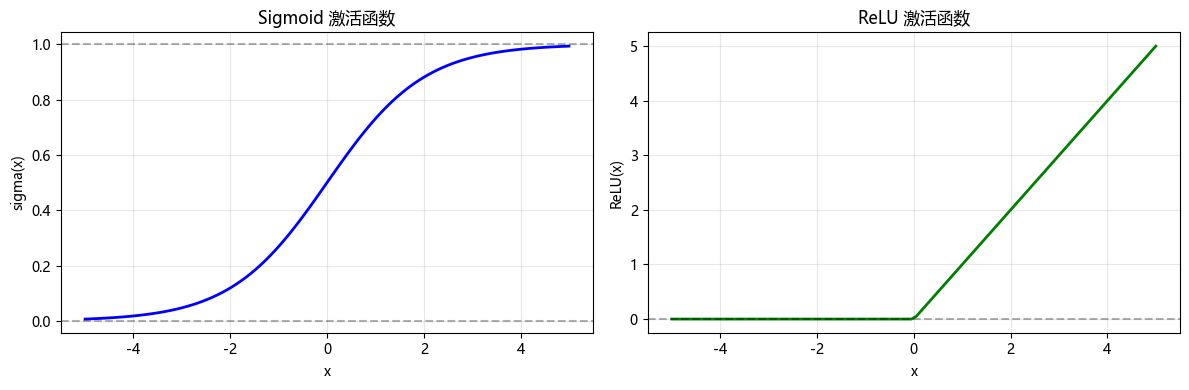

Sigmoid: 输出范围 (0, 1)，适合二分类
ReLU: 输出范围 [0, +inf)，是现在最常用的激活函数


In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

# Sigmoid: sigma(x) = 1 / (1 + e^(-x))
sigmoid = 1 / (1 + np.exp(-x))

# ReLU: max(0, x)
relu = np.maximum(0, x)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, sigmoid, 'b-', linewidth=2)
axes[0].set_title('Sigmoid 激活函数', fontsize=12)
axes[0].set_xlabel('x')
axes[0].set_ylabel('sigma(x)')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axhline(y=1, color='k', linestyle='--', alpha=0.3)

axes[1].plot(x, relu, 'g-', linewidth=2)
axes[1].set_title('ReLU 激活函数', fontsize=12)
axes[1].set_xlabel('x')
axes[1].set_ylabel('ReLU(x)')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print("Sigmoid: 输出范围 (0, 1)，适合二分类")
print("ReLU: 输出范围 [0, +inf)，是现在最常用的激活函数")

### 2.3 神经网络的结构

- **线性部分**：z = W * x + b
- **非线性部分**：
    - a = 激活函数(z)
    - 多层叠加：神经网络 = 多个线性变换 + 激活函数 组合

## 3. 神经网络结构详解

### 3.1 网络结构示意图

```输入层          隐藏层          输出层  O              O              O  |         /    |    \         |  |        /     |     \        |  O       O      O      O       O  |      /|\    /|\    /|\      |  O     OOO    OOO    OOO     O```

### 3.2 前向传播 (Forward Propagation)

数据从输入层 -> 隐藏层 -> 输出层的传播过程。

**公式**：

$$
z^{l} = W^{l} * a^{l-1} + b^{l}a^{l} = 激活函数{z^{l}}
$$

In [8]:
# 手动实现一个简单的前向传播
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 简单的 2 层神经网络
np.random.seed(42)

# 初始化权重和偏置
W1 = np.random.randn(2, 3)   # 输入到隐藏层: 2x3
b1 = np.random.randn(3)      # 隐藏层偏置: 3个
W2 = np.random.randn(3, 1)   # 隐藏层到输出层: 3x1
b2 = np.random.randn(1)      # 输出层偏置: 1个

# 前向传播
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a2, (z1, a1, z2)

# 测试
X_test = np.array([[0.5, 1.0]])
output, cache = forward(X_test)
print(f"输入: {X_test}")
print(f"输出: {output[0][0]:.4f}")
print(f"\n中间结果:")
print(f"  隐藏层输入 z1: {cache[0]}")
print(f"  隐藏层输出 a1: {cache[1]}")
print(f"  输出层输入 z2: {cache[2]}")

输入: [[0.5 1. ]]
输出: 0.5726

中间结果:
  隐藏层输入 z1: [[ 3.35059975  0.4641492  -0.37976707]]
  隐藏层输出 a1: [[0.96612447 0.61399802 0.40618308]]
  输出层输入 z2: [[0.29243372]]


## 4. 损失函数：衡量预测的好坏

### 4.1 均方误差(MSE)

$$
MSE = \frac{1}{n}\sum((y_i - \hat{y_i})^2
$$

**为什么用平方而不是绝对值？**

- 平方可导，便于计算
- 平方让大误差受到更大惩罚

均方误差 (MSE): 0.0220


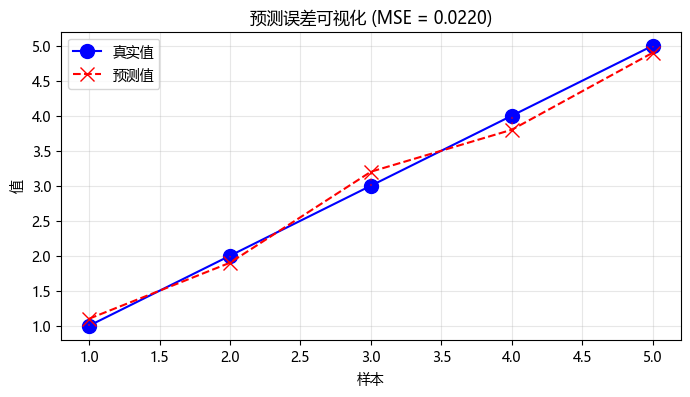

In [9]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 示例
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

loss = mse_loss(y_true, y_pred)
print(f"均方误差 (MSE): {loss:.4f}")

# 可视化误差
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), y_true, 'bo-', label='真实值', markersize=10)
plt.plot(range(1, 6), y_pred, 'rx--', label='预测值', markersize=10)
for i in range(5):
    plt.vlines(i+1, min(y_true[i], y_pred[i]), max(y_true[i], y_pred[i]), 
               colors='red', alpha=0.5, linestyles='dotted')
plt.xlabel('样本')
plt.ylabel('值')
plt.title(f'预测误差可视化 (MSE = {loss:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. 梯度下降：找到最优参数

### 5.1 核心思想

想象一个乒乓球在凹凸不平的地面上滚动：
- 重力让它往低处滚
- 最终停在某个"坑底"（极小值点）

**梯度下降公式**：
$$
W_{new} = W_{old} - \eta* (\frac{dL}{dW})
$$

其中 $\eta$ 是学习率

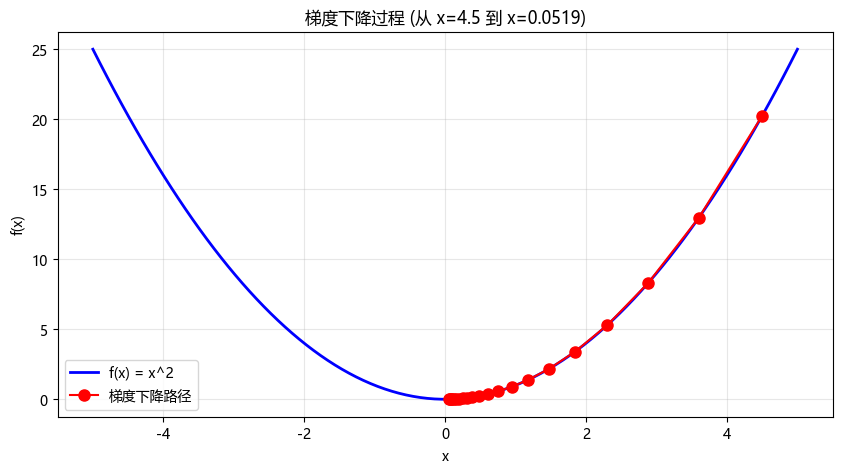

起点: x = 4.5
终点: x = 0.0519
最小值点理论值: x = 0


In [10]:
# 可视化梯度下降过程
def f(x):
    return x**2

def df(x):
    return 2 * x

# 梯度下降
x = 4.5  # 起点
lr = 0.1  # 学习率
history = [x]

for i in range(20):
    grad = df(x)
    x = x - lr * grad
    history.append(x)

# 可视化
x_range = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 5))
plt.plot(x_range, f(x_range), 'b-', linewidth=2, label='f(x) = x^2')
plt.plot(history, [f(x) for x in history], 'ro-', markersize=8, label='梯度下降路径')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'梯度下降过程 (从 x={history[0]:.1f} 到 x={history[-1]:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"起点: x = {history[0]}")
print(f"终点: x = {history[-1]:.4f}")
print(f"最小值点理论值: x = 0")

### 5.2 学习率的影响

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

learning_rates = [0.01, 0.3, 0.9]
titles = ['学习率太小 (收敛慢)', '学习率适中 (理想)', '学习率太大 (震荡)']

for ax, lr, title in zip(axes, learning_rates, titles):
    x = 4.5
    history = [x]
    
    for _ in range(15):
        grad = df(x)
        x = x - lr * grad
        history.append(x)
    
    ax.plot(x_range, f(x_range), 'b-', linewidth=1)
    ax.plot(history, [f(x) for x in history], 'ro-', markersize=6)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-5, 5)

plt.tight_layout()
plt.show()

print("学习率太小时收敛慢，学习率太大时可能无法收敛")

## 6. 反向传播：链式法则

### 6.1 链式法则 (Chain Rule)

神经网络是一个复合函数：
$$
L = f(g(h(x)))
$$

**链式法则**：
$$
\frac{dL}{dx} = \frac{dL}{df} \cdot \frac{df}{dg} \cdot \frac{dg}{dh} \cdot \frac{dh}{dx}
$$

**在神经网络中**：
$$
\hat{y} = f(a),\quad a = \sigma(z),\quad z = Wx + b,\quad L = \text{Loss}(\hat{y}, y)
$$

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial W}
$$

Epoch 20, Loss: 1.2027
Epoch 40, Loss: 1.0303
Epoch 60, Loss: 0.9236
Epoch 80, Loss: 0.8581
Epoch 100, Loss: 0.8179


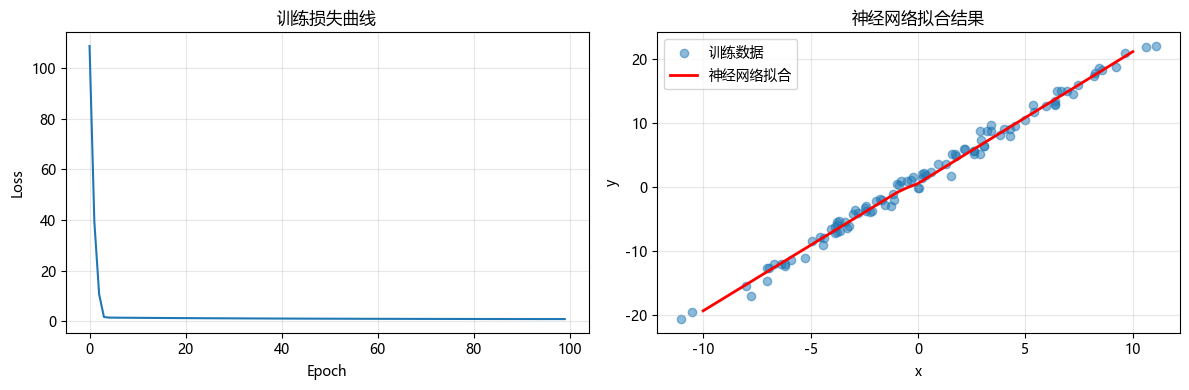

In [11]:
# 使用 PyTorch 实现一个完整的神经网络训练过程
import torch
import torch.nn as nn
import torch.optim as optim

# 生成训练数据: y = 2x + 1 + 噪声
np.random.seed(42)
torch.manual_seed(42)

X_train = torch.randn(100, 1) * 5  # 100个样本
y_train = 2 * X_train + 1 + torch.randn(100, 1)  # 添加噪声

# 定义神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 10)  # 隐藏层: 10个神经元
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # 输出层
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练
losses = []
for epoch in range(100):
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 可视化训练过程
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('训练损失曲线')
axes[0].grid(True, alpha=0.3)

with torch.no_grad():
    X_plot = torch.linspace(-10, 10, 100).reshape(-1, 1)
    y_plot = model(X_plot)
    
axes[1].scatter(X_train, y_train, alpha=0.5, label='训练数据')
axes[1].plot(X_plot, y_plot, 'r-', linewidth=2, label='神经网络拟合')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('神经网络拟合结果')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 反向传播的工作原理

In [12]:
# 可视化反向传播的梯度流动
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2      # y = x^2
z = y * 3       # z = 3y = 3x^2
w = z + 1       # w = z + 1 = 3x^2 + 1

# 反向传播
w.backward()

print("计算图: x -> y = x^2 -> z = 3y -> w = z + 1")
print(f"\n前向传播:")
print(f"  x = {x.item()}")
print(f"  y = x^2 = {y.item()}")
print(f"  z = 3y = {z.item()}")
print(f"  w = z + 1 = {w.item()}")
print(f"\n反向传播 (梯度):")
print(f"  dw/dx = {x.grad.item():.1f} (链式法则)")

print(f"\n验证: 6 * x = 6 * {x.item()} = {6 * x.item()}")

计算图: x -> y = x^2 -> z = 3y -> w = z + 1

前向传播:
  x = 2.0
  y = x^2 = 4.0
  z = 3y = 12.0
  w = z + 1 = 13.0

反向传播 (梯度):
  dw/dx = 12.0 (链式法则)

验证: 6 * x = 6 * 2.0 = 12.0


## 7. 总结：神经网络的训练流程

```+---------------------------------------------------------+|           神经网络训练流程                               |+---------------------------------------------------------+|                                                         ||  1. 初始化: 随机初始化权重 W 和偏置 b                   ||              |                                          ||  2. 前向传播: 输入 -> 隐藏层 -> 输出层                  ||              |                                          ||  3. 计算损失: MSE = sum((y - y_hat)^2) / n             ||              |                                          ||  4. 反向传播: 计算 dL/dW (链式法则)                    ||              |                                          ||  5. 梯度下降: W = W - lr * dL/dW                       ||              |                                          ||  6. 重复步骤 2-5 直到损失足够小                         ||                                                         |+---------------------------------------------------------+```

## 8. 下一步：探索 Transformer

在理解了这些基础概念后，你可以继续探索：
- **注意力机制 (Attention)**：让模型学会关注最重要的输入
- **自注意力 (Self-Attention)**：序列内部的关系建模
- **位置编码 (Positional Encoding)**：为序列添加位置信息
- **多头注意力 (Multi-Head Attention)**：并行学习多种关系
- **Encoder-Decoder 架构**：处理序列到序列的任务